In [1]:
import os

from IPython.display import display, Image
def total_files(folder_path):
    num_files = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
    return num_files


train_files_Tomato__Tomato_YellowLeaf__Curl_Virus = "Dataset/Train/Train/Tomato__Tomato_YellowLeaf__Curl_Virus"
train_files_Tomato_Bacterial_spot = "Dataset/Train/Train/Tomato_Bacterial_spot"
train_files_Tomato_Early_blight = "Dataset/Train/Train/Tomato_Early_blight"
train_files_Tomato_healthy = "Dataset/Train/Train/Tomato_healthy"
train_files_Tomato_Late_blight = "Dataset/Train/Train/Tomato_Late_blight"



test_files_Tomato__Tomato_YellowLeaf__Curl_Virus = "Dataset/Test/Test/Tomato__Tomato_YellowLeaf__Curl_Virus"
test_files_Tomato_Bacterial_spot = "Dataset/Test/Test/Tomato_Bacterial_spot"
test_files_Tomato_Early_blight = "Dataset/Test/Test/Tomato_Early_blight"
test_files_Tomato_healthy = "Dataset/Test/Test/Tomato_healthy"
test_files_Tomato_Late_blight = "Dataset/Test/Test/Tomato_Late_blight"




valid_files_Tomato__Tomato_YellowLeaf__Curl_Virus = "Dataset/Validation/Validation/Tomato__Tomato_YellowLeaf__Curl_Virus"
valid_files_Tomato_Bacterial_spot = "Dataset/Validation/Validation/Tomato_Bacterial_spot"
valid_files_Tomato_Early_blight = "Dataset/Validation/Validation/Tomato_Early_blight"
valid_files_Tomato_healthy = "Dataset/Validation/Validation/Tomato_healthy"
valid_files_Tomato_Late_blight = "Dataset/Validation/Validation/Tomato_Late_blight"




print("Number of Yellow Leaf Curl Virus leaf images in training set:", total_files(train_files_Tomato__Tomato_YellowLeaf__Curl_Virus))
print("Number of Bacterial Spot leaf images in training set:", total_files(train_files_Tomato_Bacterial_spot))
print("Number of Early Blight leaf images in training set:", total_files(train_files_Tomato_Early_blight))
print("Number of Healthy leaf images in training set:", total_files(train_files_Tomato_healthy))
print("Number of Late Blight leaf images in training set:", total_files(train_files_Tomato_Late_blight))


print("========================================================")


print("Number of Yellow Leaf Curl Virus leaf images in test set:", total_files(test_files_Tomato__Tomato_YellowLeaf__Curl_Virus))
print("Number of Bacterial Spot leaf images in test set:", total_files(test_files_Tomato_Bacterial_spot))
print("Number of Early Blight leaf images in test set:", total_files(test_files_Tomato_Early_blight))
print("Number of Healthy leaf images in test set:", total_files(test_files_Tomato_healthy))
print("Number of Late Blight leaf images in test set:", total_files(test_files_Tomato_Late_blight))


print("========================================================")


print("Number of Yellow Leaf Curl Virus leaf images in validation set:", total_files(valid_files_Tomato__Tomato_YellowLeaf__Curl_Virus))
print("Number of Bacterial Spot leaf images in validation set:", total_files(valid_files_Tomato_Bacterial_spot))
print("Number of Early Blight leaf images in validation set:", total_files(valid_files_Tomato_Early_blight))
print("Number of Healthy leaf images in validation set:", total_files(valid_files_Tomato_healthy))
print("Number of Late Blight leaf images in validation set:", total_files(valid_files_Tomato_Late_blight))


Number of Yellow Leaf Curl Virus leaf images in training set: 2571
Number of Bacterial Spot leaf images in training set: 1021
Number of Early Blight leaf images in training set: 480
Number of Healthy leaf images in training set: 763
Number of Late Blight leaf images in training set: 916
Number of Yellow Leaf Curl Virus leaf images in test set: 858
Number of Bacterial Spot leaf images in test set: 341
Number of Early Blight leaf images in test set: 160
Number of Healthy leaf images in test set: 255
Number of Late Blight leaf images in test set: 307
Number of Yellow Leaf Curl Virus leaf images in validation set: 857
Number of Bacterial Spot leaf images in validation set: 340
Number of Early Blight leaf images in validation set: 160
Number of Healthy leaf images in validation set: 254
Number of Late Blight leaf images in validation set: 305


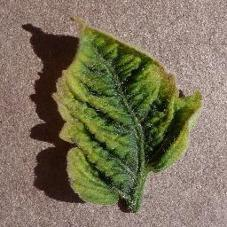

In [2]:
image_path = 'Dataset/Train/Train/Tomato__Tomato_YellowLeaf__Curl_Virus/Tyl41.jpg'

with open(image_path, 'rb') as f:
    display(Image(data=f.read(), width=500))

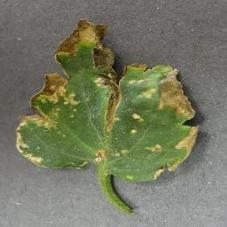

In [3]:
image_path = 'Dataset/Train/Train/Tomato_Bacterial_spot/Bs3.jpg'

with open(image_path, 'rb') as f:
    display(Image(data=f.read(), width=500))

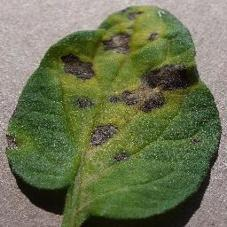

In [4]:
image_path = 'Dataset/Train/Train/Tomato_Early_blight/Eb18.jpg'

with open(image_path, 'rb') as f:
    display(Image(data=f.read(), width=500))

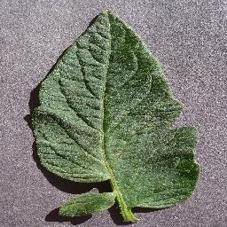

In [5]:
image_path = 'Dataset/Train/Train/Tomato_healthy/H11.jpg'

with open(image_path, 'rb') as f:
    display(Image(data=f.read(), width=500))

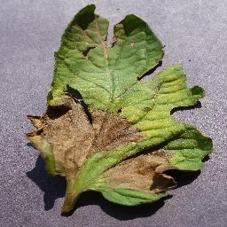

In [6]:
image_path = 'Dataset/Train/Train/Tomato_Late_blight/Lb17.jpg'

with open(image_path, 'rb') as f:
    display(Image(data=f.read(), width=500))

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
from tensorflow.keras.optimizers import Adam

# Data generators
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [8]:
train_generator = train_datagen.flow_from_directory('Dataset/Train/Train',
                                                    target_size=(225, 225),
                                                    batch_size=32,
                                                    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory('Dataset/Validation/Validation',
                                                        target_size=(225, 225),
                                                        batch_size=32,
                                                        class_mode='categorical')

Found 5751 images belonging to 5 classes.
Found 1916 images belonging to 5 classes.


In [9]:
model = Sequential([
    Input(shape=(225, 225, 3)),  
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(train_generator.num_classes, activation='softmax') 
])

In [10]:
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

Epoch 1/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.6449 - loss: 0.9783   

C:\Users\harsha\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


180/180 ━━━━━━━━━━━━━━━━━━━━ 763s 4s/step - accuracy: 0.6455 - loss: 0.9766 - val_accuracy: 0.8904 - val_loss: 0.3209
Epoch 2/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 882s 5s/step - accuracy: 0.8576 - loss: 0.3834 - val_accuracy: 0.9181 - val_loss: 0.2501
Epoch 3/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 777s 4s/step - accuracy: 0.9112 - loss: 0.2554 - val_accuracy: 0.8763 - val_loss: 0.3297
Epoch 4/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 787s 4s/step - accuracy: 0.9163 - loss: 0.2451 - val_accuracy: 0.9395 - val_loss: 0.1701
Epoch 5/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 760s 4s/step - accuracy: 0.9203 - loss: 0.2154 - val_accuracy: 0.9186 - val_loss: 0.2387
Epoch 6/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 749s 4s/step - accuracy: 0.9395 - loss: 0.1735 - val_accuracy: 0.9280 - val_loss: 0.2177
Epoch 7/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 749s 4s/step - accuracy: 0.9417 - loss: 0.1695 - val_accuracy: 0.9525 - val_loss: 0.1417
Epoch 8/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 751s 4s/step - accuracy: 0.9517 - loss: 0.1491 - val_accuracy: 0.928

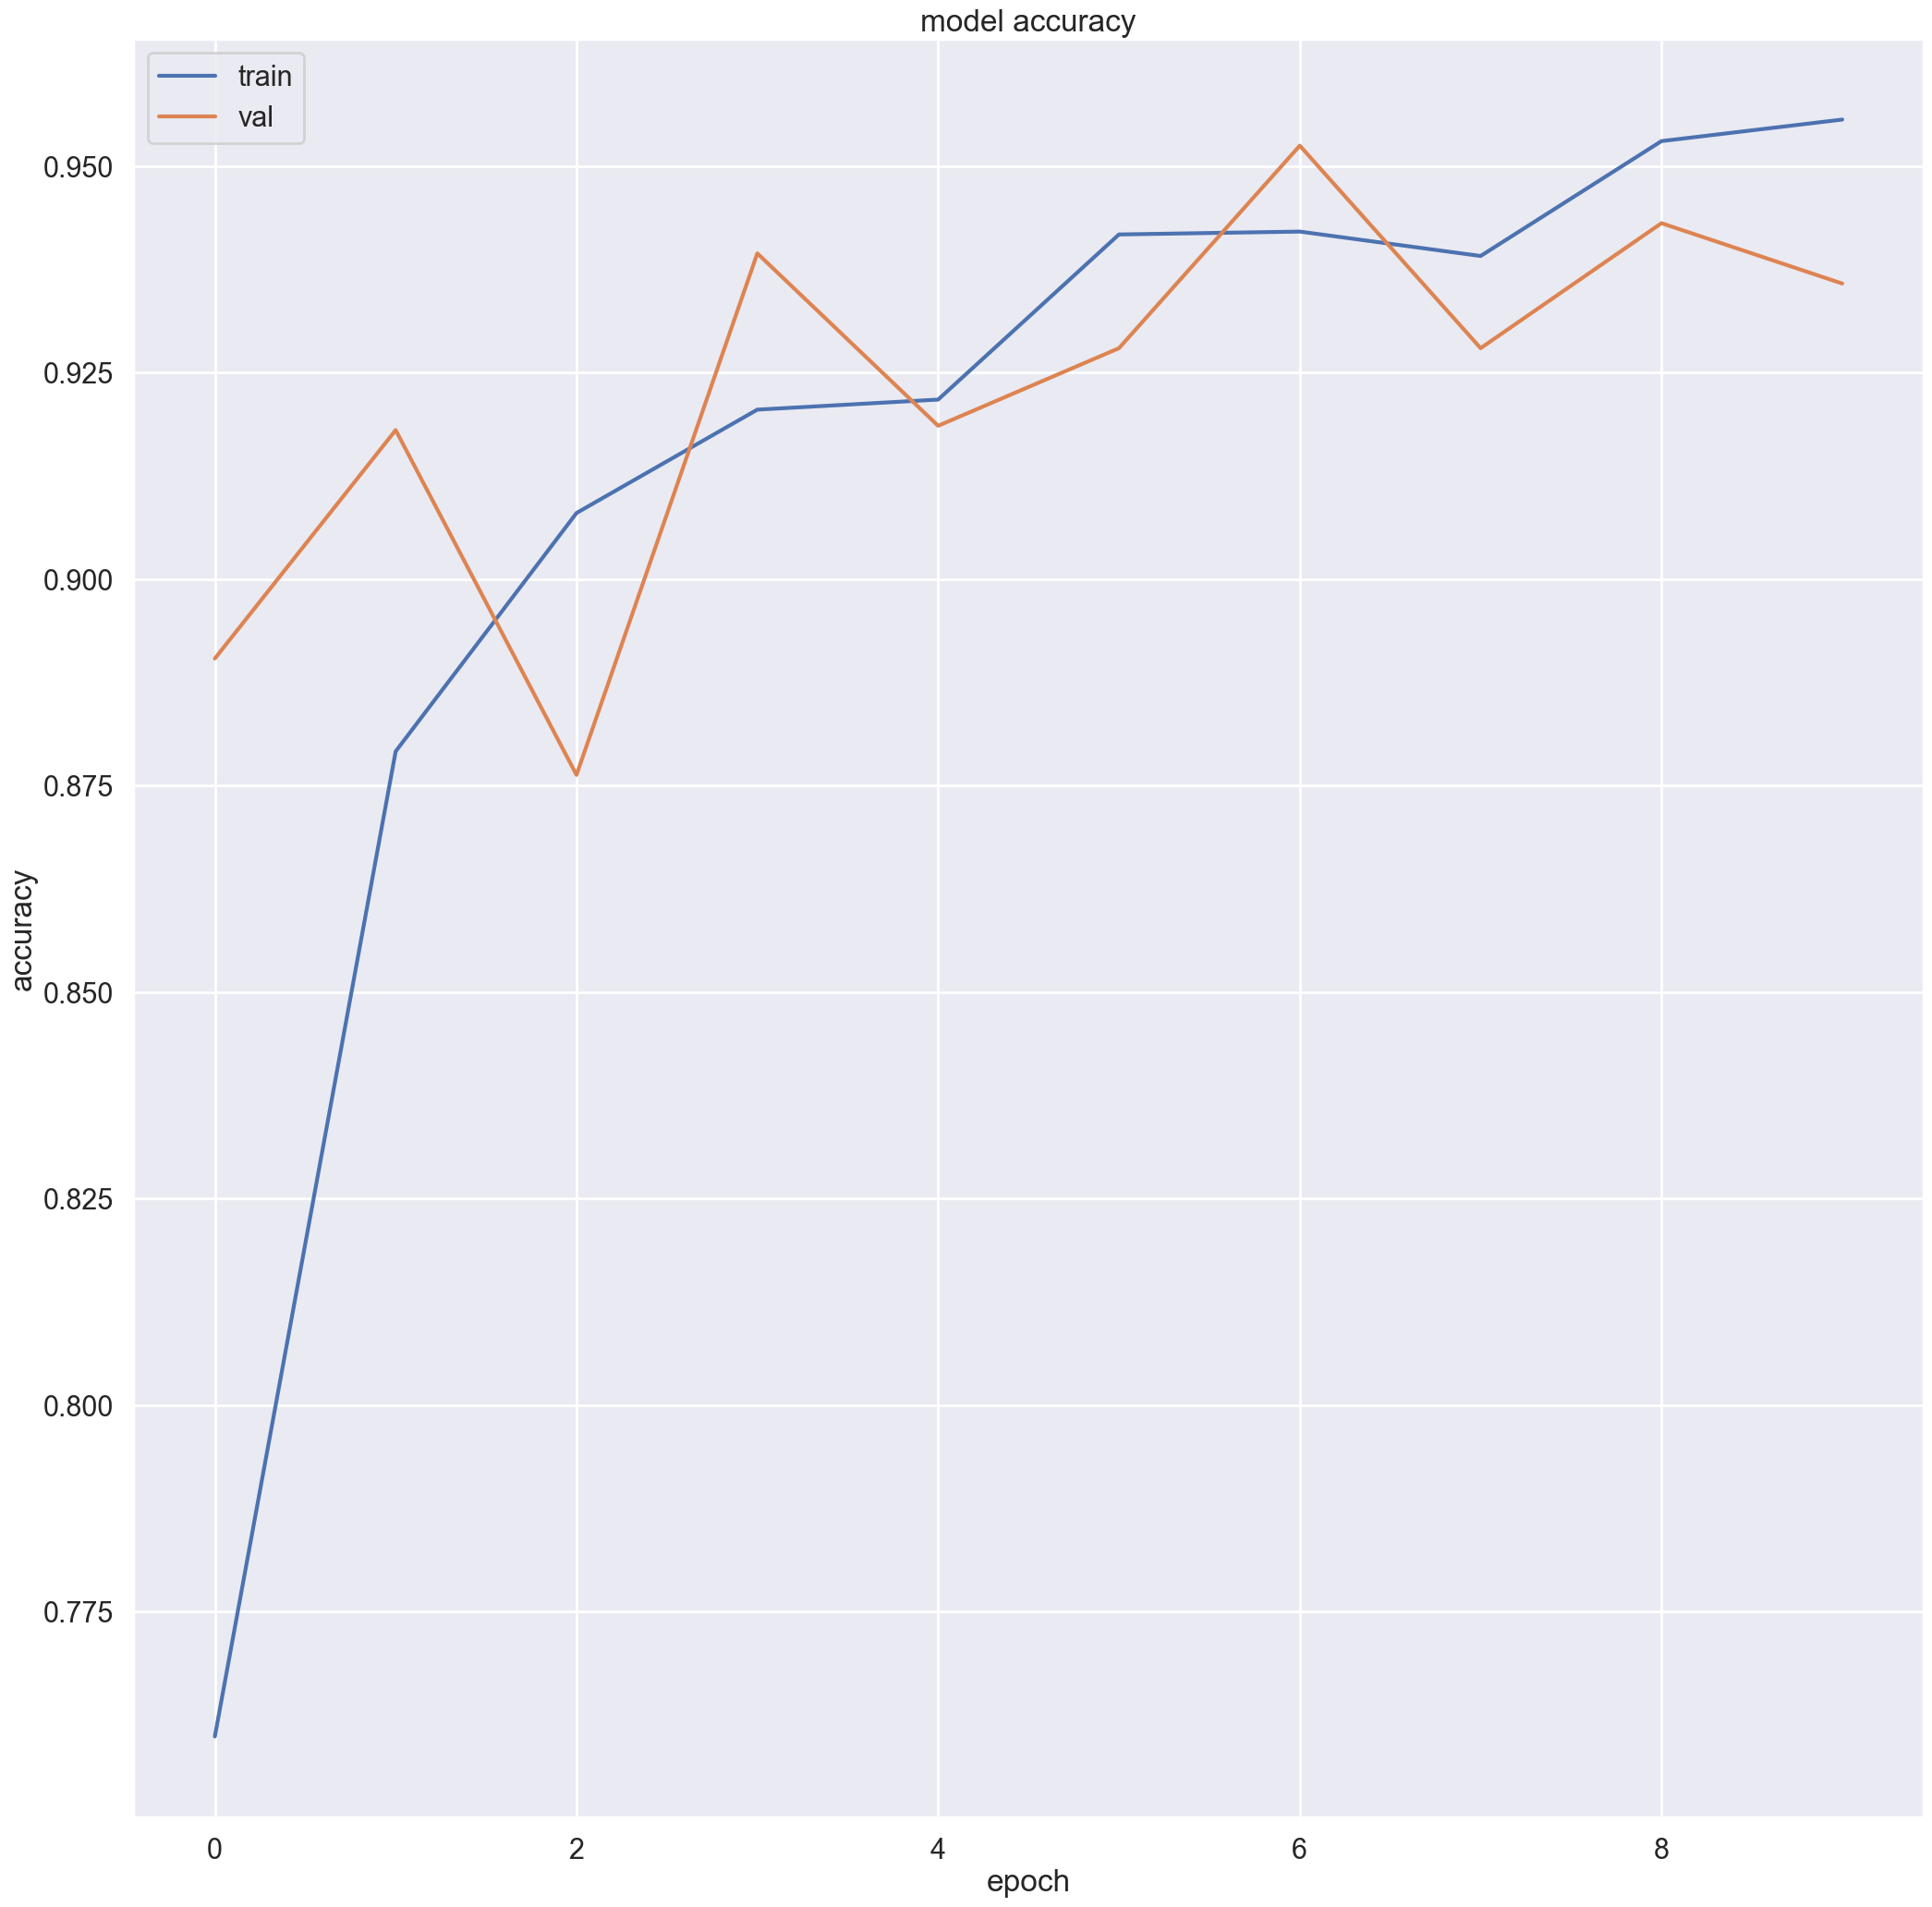

In [14]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

import seaborn as sns
sns.set_theme()
sns.set_context("poster")

figure(figsize=(25, 25), dpi=100)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [15]:
model.save('my_model.keras')

In [16]:

from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

def preprocess_image(image_path, target_size=(225, 225)):
    img = load_img(image_path, target_size=target_size)
    x = img_to_array(img)
    x = x.astype('float32') / 255.
    x = np.expand_dims(x, axis=0)
    return x

x = preprocess_image('Dataset/Test/Test/Tomato_Bacterial_spot/Bs163.jpg')

In [17]:
predictions = model.predict(x)
predictions[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step


array([8.177037e-01, 3.341505e-03, 4.241816e-04, 1.785306e-01,
       3.560693e-08], dtype=float32)

In [18]:
labels = train_generator.class_indices
labels = {v: k for k, v in labels.items()}
labels

{0: 'Tomato_Bacterial_spot',
 1: 'Tomato_Early_blight',
 2: 'Tomato_Late_blight',
 3: 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 4: 'Tomato_healthy'}

In [19]:
predicted_label = labels[np.argmax(predictions)]
print(predicted_label)

Tomato_Bacterial_spot
